# 📊 Exploratory Data Analysis (EDA)

**Dataset:** BTC & ETH daily price joined with daily sentiment (2018–2025)


In [8]:
# --- Cell 2: Imports & Configuration ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
sns.set_style("whitegrid")
%matplotlib inline

## 2. Load Merged BTC & ETH Data

We have two merged CSV files in `data/processed/`:
- `merged_btc.csv` (contains Date, Open, High, Low, Close, Adj Close, Volume, avg_sentiment, news_count, date)
- `merged_eth.csv`

Let's load them into dataframes and inspect the first few rows.


In [10]:
# --- Hücre 4 (Güncellenmiş): merged_btc.csv ve merged_eth.csv dosyalarını okuyalım ---
btc_merged = pd.read_csv("../data/processed/merged_btc.csv", parse_dates=["Date"])
eth_merged = pd.read_csv("../data/processed/merged_eth.csv", parse_dates=["Date"])

print("⏳ BTC merged shape:", btc_merged.shape)
print("⏳ ETH merged shape:", eth_merged.shape)

print("\n--- BTC merged (ilk 5 satır) ---")
display(btc_merged.head())

print("\n--- ETH merged (ilk 5 satır) ---")
display(eth_merged.head())


⏳ BTC merged shape: (2713, 9)
⏳ ETH merged shape: (2713, 9)

--- BTC merged (ilk 5 satır) ---


,Date,Close,High,Low,Open,Volume,date,avg_sentiment,news_count
0,NaT,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,NaN,0.0000,0
1,2018-01-01,13657.2001953125,14112.2001953125,13154.7001953125,14112.2001953125,10291200000,2018-01-01,0.0000,0
2,2018-01-02,14982.099609375,15444.599609375,13163.599609375,13625.0,16846600192,2018-01-02,-0.0772,1
3,2018-01-03,15201.0,15572.7998046875,14844.5,14978.2001953125,16871900160,2018-01-03,-0.0772,0
4,2018-01-04,15599.2001953125,15739.7001953125,14522.2001953125,15270.7001953125,21783199744,2018-01-04,-0.0772,0



--- ETH merged (ilk 5 satır) ---


,Date,Close,High,Low,Open,Volume,date,avg_sentiment,news_count
0,NaT,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,NaN,0.0,0
1,2018-01-01,772.6409912109375,782.530029296875,742.0040283203125,755.7570190429688,2595760128,2018-01-01,0.0,0
2,2018-01-02,884.4439697265625,914.8300170898438,772.3460083007812,772.3460083007812,5783349760,2018-01-02,0.0,0
3,2018-01-03,962.719970703125,974.4710083007812,868.4509887695312,886.0,5093159936,2018-01-03,0.0,0
4,2018-01-04,980.9219970703125,1045.0799560546875,946.0859985351562,961.7130126953125,6502859776,2018-01-04,0.0,0


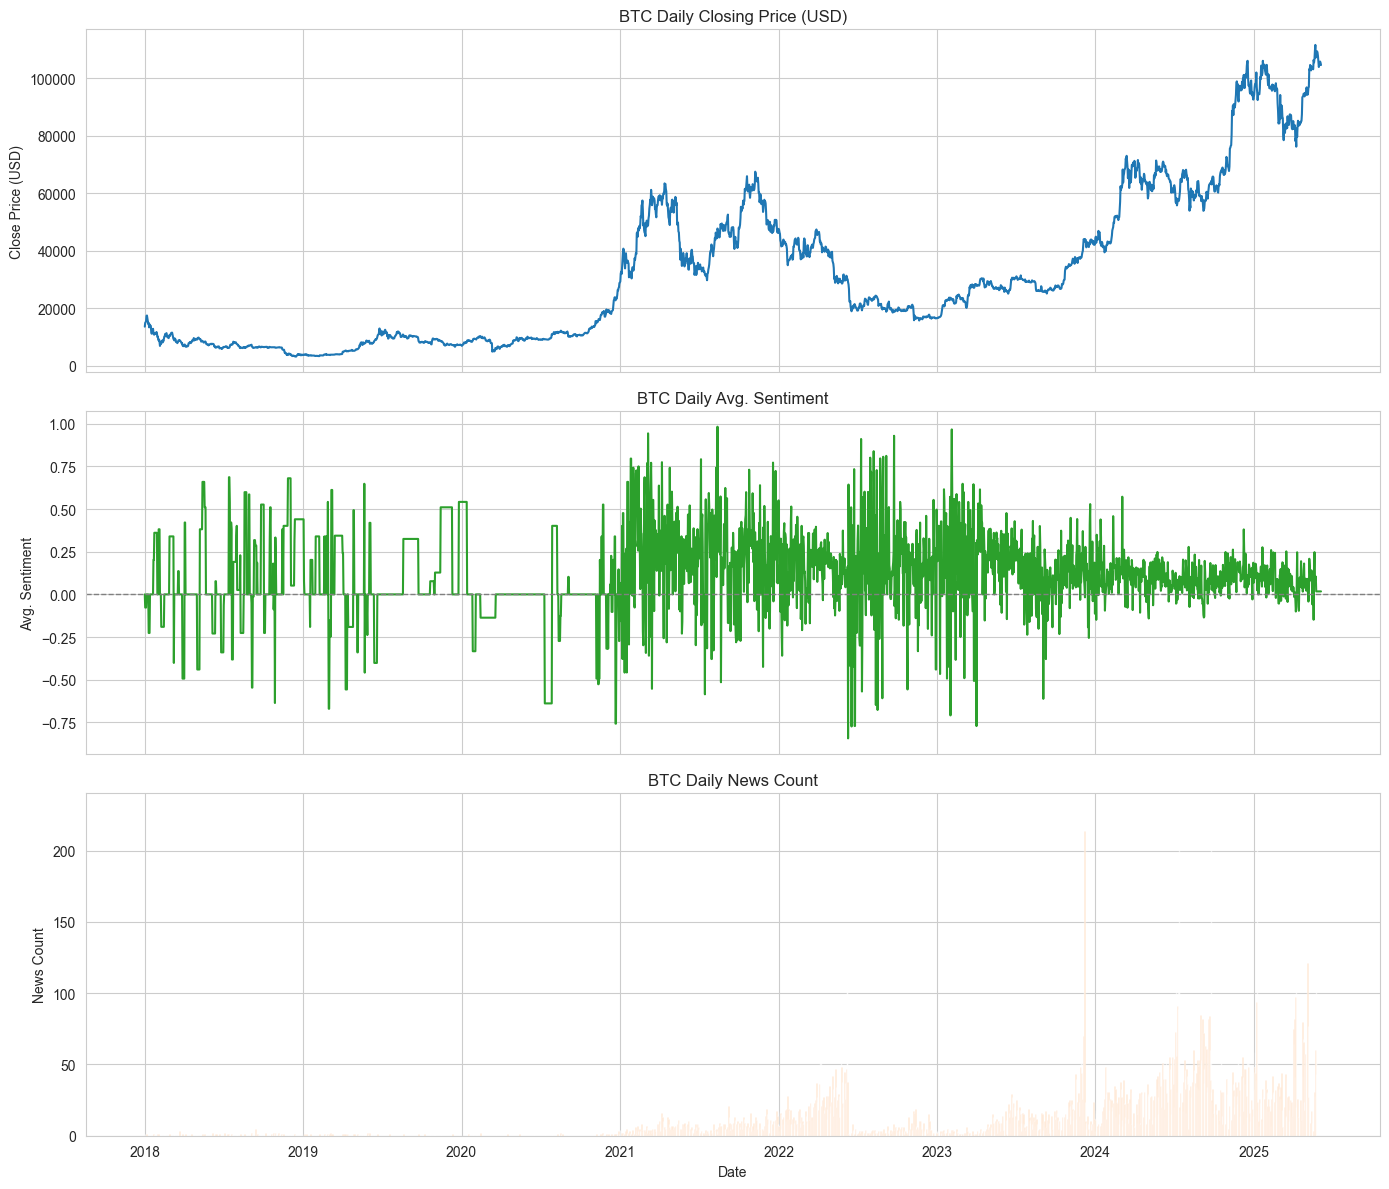

In [13]:
# --- Hücre 6 (Güncelledik): BTC Zaman Serisi Grafikleri ---

import matplotlib.pyplot as plt

# 1) İlk satırdaki NaT ve metin verilerini at (örneğin Close == 'BTC-USD' satırı)
btc_clean = btc_merged.copy()

# 'Date' sütununda NaT olan satırı at
btc_clean = btc_clean[ btc_clean['Date'].notna() ]

# 'Close' sütununda metin 'BTC-USD' geçen satırı at (ya da sayısal olmayan her şeyi at)
# Pandas to_numeric hata verdiğinde NaN olacak; sonra NaN atılır.
btc_clean['Close'] = pd.to_numeric(btc_clean['Close'], errors='coerce')
btc_clean['avg_sentiment'] = pd.to_numeric(btc_clean['avg_sentiment'], errors='coerce')
btc_clean['news_count'] = pd.to_numeric(btc_clean['news_count'], errors='coerce')

# "Close" sütununda NaN (hoş olmayan satırlar) varsa at
btc_clean = btc_clean.dropna(subset=['Close', 'avg_sentiment', 'news_count'])

# Şimdi 'Date' sütununu datetime, diğerlerini sayısala çevirdiğimize emin ol
btc_clean['Date'] = pd.to_datetime(btc_clean['Date'])

# 'Date'i index yap
btc_clean.set_index('Date', inplace=True)

# Grafik çizimi
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# 1) BTC Kapanış Fiyatı (Numerik olarak)
axes[0].plot(btc_clean.index, btc_clean['Close'], color="tab:blue")
axes[0].set_title("BTC Daily Closing Price (USD)")
axes[0].set_ylabel("Close Price (USD)")

# 2) BTC Ortalama Sentiment (Numerik olarak)
axes[1].plot(btc_clean.index, btc_clean['avg_sentiment'], color="tab:green")
axes[1].axhline(0, color="gray", linestyle="--", linewidth=1)
axes[1].set_title("BTC Daily Avg. Sentiment")
axes[1].set_ylabel("Avg. Sentiment")

# 3) BTC Günlük Haber Sayısı (Numerik olarak)
axes[2].bar(btc_clean.index, btc_clean['news_count'], color="tab:orange", alpha=0.6)
axes[2].set_title("BTC Daily News Count")
axes[2].set_ylabel("News Count")
axes[2].set_xlabel("Date")

plt.tight_layout()
plt.show()


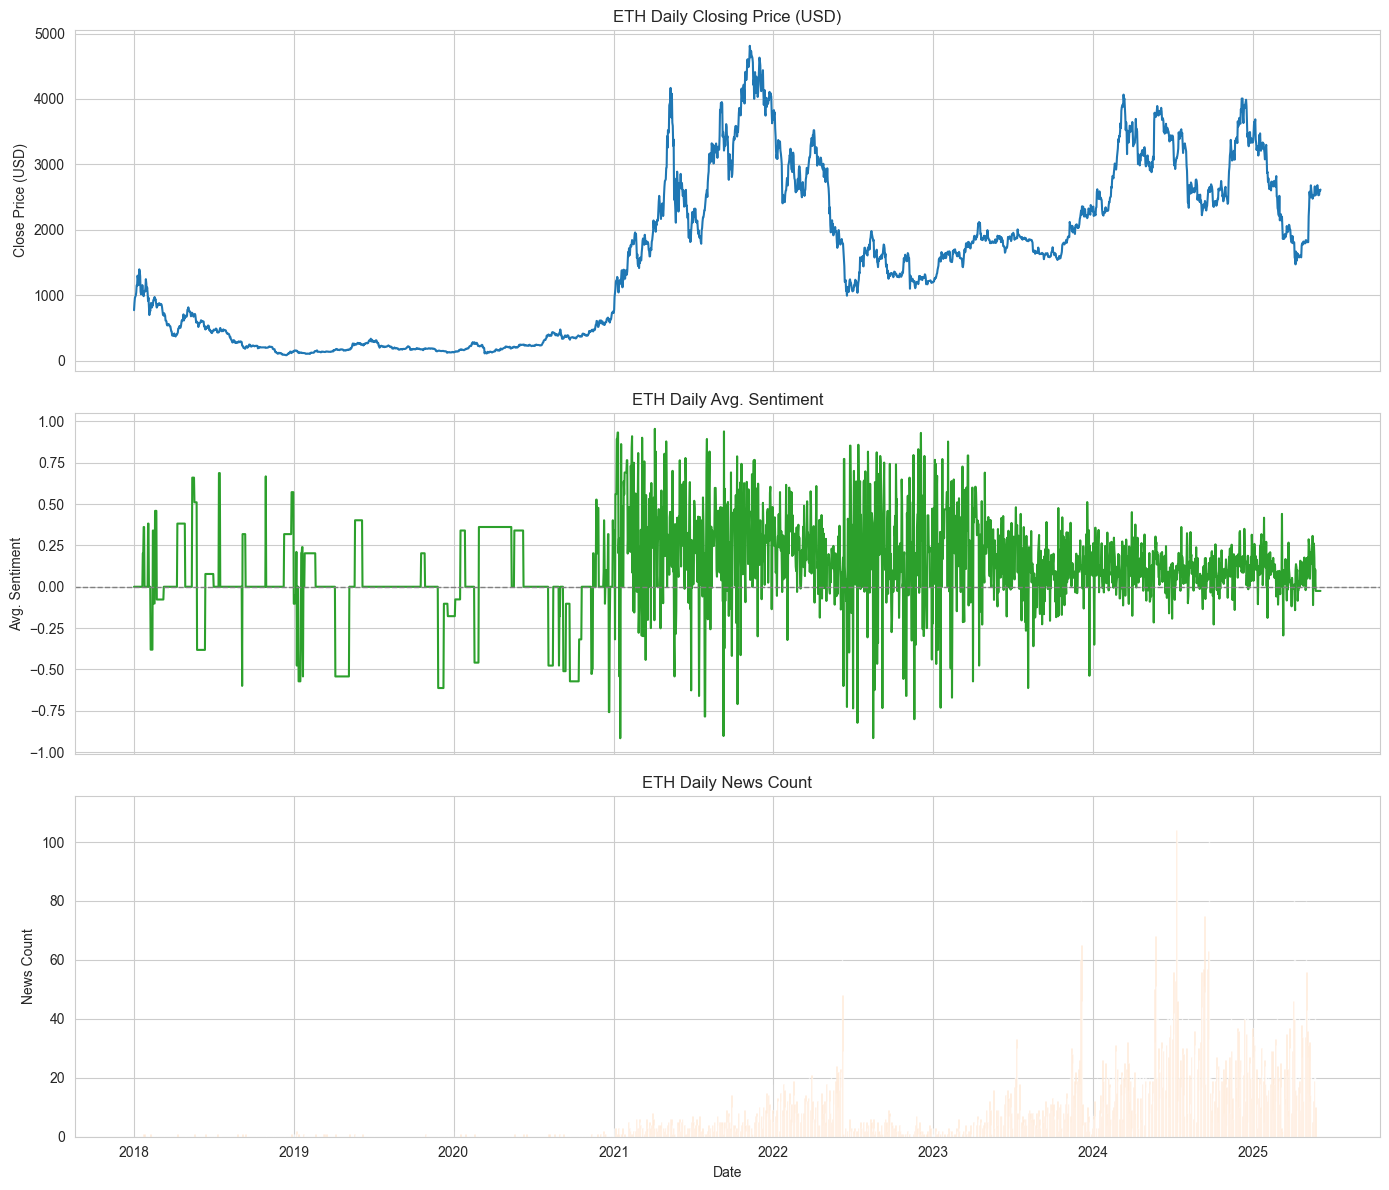

In [14]:
# --- Hücre 7 (Güncelledik): ETH Zaman Serisi Grafikleri ---

eth_clean = eth_merged.copy()

# 'Date' sütununda NaT olan satırı at
eth_clean = eth_clean[ eth_clean['Date'].notna() ]

# Numerik olmayan 'Close' vs. ortalama sentiment ve haber sayısını sayısala çevir
eth_clean['Close'] = pd.to_numeric(eth_clean['Close'], errors='coerce')
eth_clean['avg_sentiment'] = pd.to_numeric(eth_clean['avg_sentiment'], errors='coerce')
eth_clean['news_count'] = pd.to_numeric(eth_clean['news_count'], errors='coerce')

# NaN içeren satırları at
eth_clean = eth_clean.dropna(subset=['Close', 'avg_sentiment', 'news_count'])

# Tarihi datetime, tüm değerler numerik
eth_clean['Date'] = pd.to_datetime(eth_clean['Date'])

# 'Date'i index yap
eth_clean.set_index('Date', inplace=True)

# Grafik çizimi
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# 1) ETH Kapanış Fiyatı
axes[0].plot(eth_clean.index, eth_clean['Close'], color="tab:blue")
axes[0].set_title("ETH Daily Closing Price (USD)")
axes[0].set_ylabel("Close Price (USD)")

# 2) ETH Ortalama Sentiment
axes[1].plot(eth_clean.index, eth_clean['avg_sentiment'], color="tab:green")
axes[1].axhline(0, color="gray", linestyle="--", linewidth=1)
axes[1].set_title("ETH Daily Avg. Sentiment")
axes[1].set_ylabel("Avg. Sentiment")

# 3) ETH Günlük Haber Sayısı
axes[2].bar(eth_clean.index, eth_clean['news_count'], color="tab:orange", alpha=0.6)
axes[2].set_title("ETH Daily News Count")
axes[2].set_ylabel("News Count")
axes[2].set_xlabel("Date")

plt.tight_layout()
plt.show()


🔍 BTC Close vs. Avg Sentiment correlation: 0.0836


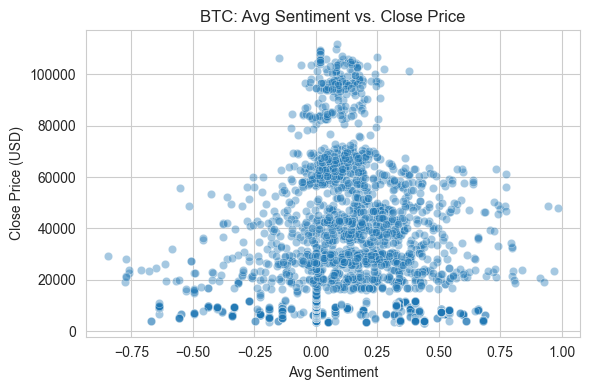

🔍 ETH Close vs. Avg Sentiment correlation: 0.2693


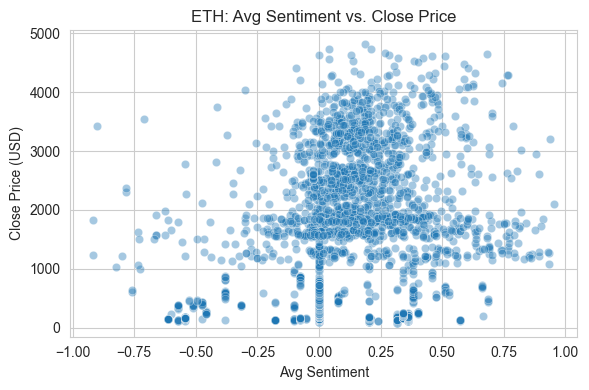

In [15]:
# --- Hücre: Korelasyon Hesaplama ve Scatter Plot ---

import seaborn as sns

# 1) BTC için: 'Close' ile 'avg_sentiment' arasındaki Pearson korelasyonu
btc_corr = btc_clean[["Close", "avg_sentiment"]].corr().iloc[0, 1]
print(f"🔍 BTC Close vs. Avg Sentiment correlation: {btc_corr:.4f}")

# Scatter plot BTC
plt.figure(figsize=(6, 4))
sns.scatterplot(x="avg_sentiment", y="Close", data=btc_clean, alpha=0.4, color="tab:blue")
plt.title("BTC: Avg Sentiment vs. Close Price")
plt.xlabel("Avg Sentiment")
plt.ylabel("Close Price (USD)")
plt.tight_layout()
plt.show()


# 2) ETH için: 'Close' ile 'avg_sentiment' arasındaki Pearson korelasyonu
eth_corr = eth_clean[["Close", "avg_sentiment"]].corr().iloc[0, 1]
print(f"🔍 ETH Close vs. Avg Sentiment correlation: {eth_corr:.4f}")

# Scatter plot ETH
plt.figure(figsize=(6, 4))
sns.scatterplot(x="avg_sentiment", y="Close", data=eth_clean, alpha=0.4, color="tab:blue")
plt.title("ETH: Avg Sentiment vs. Close Price")
plt.xlabel("Avg Sentiment")
plt.ylabel("Close Price (USD)")
plt.tight_layout()
plt.show()


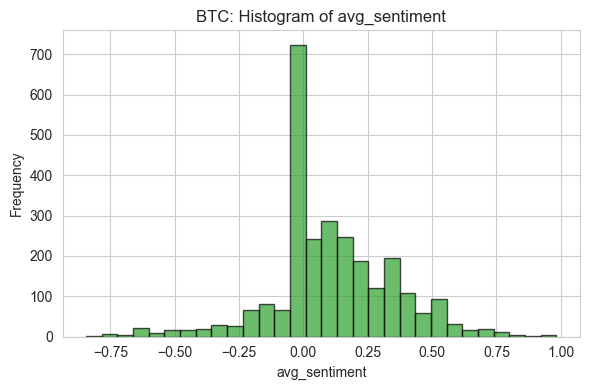

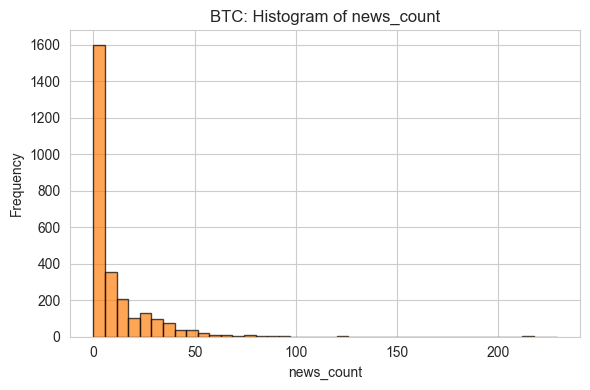

In [16]:
# --- Hücre: BTC Histogramları ---

# 1) BTC avg_sentiment dağılımı
plt.figure(figsize=(6, 4))
plt.hist(btc_clean["avg_sentiment"], bins=30, edgecolor="k", alpha=0.7, color="tab:green")
plt.title("BTC: Histogram of avg_sentiment")
plt.xlabel("avg_sentiment")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2) BTC news_count dağılımı
plt.figure(figsize=(6, 4))
plt.hist(btc_clean["news_count"], bins=40, edgecolor="k", alpha=0.7, color="tab:orange")
plt.title("BTC: Histogram of news_count")
plt.xlabel("news_count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
